In [14]:
import pandas as pd
from sqlalchemy import create_engine
# 1. MySQL 접속 정보 설정
user = 'root'        # 예: 'root'
password = 'MYSQL'    # 예: '1234'
host = 'localhost'            # 원격이면 IP 주소
port = 3306                   # 기본 포트는 3306
database = 'sparta'    # 예: 'testdb'
# 2. SQLAlchemy를 이용한 연결 엔진 생성
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
# 3. 쿼리문 작성 및 실행 → pandas DataFrame으로 가져오기
query = "SELECT * FROM house2018"  # 가져올 테이블명 작성
df = pd.read_sql(query, con=engine)
# 4. 결과 확인

In [15]:
import pandas as pd
import glob
import os
# 1. 폴더 경로 (macOS 경로 그대로 사용)
folder_path = "C:/Users/kimss/Desktop/python/seoul"
# 2. 폴더 안의 20xx.csv 형식의 파일 목록 찾기
file_paths = glob.glob(os.path.join(folder_path, 'house*.csv'))
print("찾은 CSV 파일들:", file_paths)  # 파일이 실제로 잡히는지 확인
# 3. 파일들 읽어서 연도 열 추가
dfs = []
for path in file_paths:
    year = os.path.basename(path).split('.')[0]  # 예: '2018.csv' → '2018'
    try:
        df = pd.read_csv(path, encoding = 'euc-kr')  # 필요한 경우 encoding='utf-8-sig' 또는 'cp949' 추가
        df['접수연도'] = int(year)
        dfs.append(df)
    except Exception as e:
        print(f":경고: {path} 읽는 중 에러 발생:", e)
# 4. 데이터 병합
if dfs:
    df_all = pd.concat(dfs, ignore_index=True)
    print(":흰색_확인_표시: 데이터 병합 완료 (미리보기):")
    print(df_all.head())
else:
    print(":x: 'house*.csv' 파일을 찾을 수 없거나, 읽을 수 없습니다.")

찾은 CSV 파일들: ['C:/Users/kimss/Desktop/python/seoul\\house2018.csv', 'C:/Users/kimss/Desktop/python/seoul\\house2019.csv', 'C:/Users/kimss/Desktop/python/seoul\\house2020.csv', 'C:/Users/kimss/Desktop/python/seoul\\house2021.csv', 'C:/Users/kimss/Desktop/python/seoul\\house2022.csv', 'C:/Users/kimss/Desktop/python/seoul\\house2023.csv', 'C:/Users/kimss/Desktop/python/seoul\\house2024.csv']
:경고: C:/Users/kimss/Desktop/python/seoul\house2018.csv 읽는 중 에러 발생: invalid literal for int() with base 10: 'house2018'


C:\Users\kimss\AppData\Local\Temp\ipykernel_21900\2337619334.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding = 'euc-kr')  # 필요한 경우 encoding='utf-8-sig' 또는 'cp949' 추가


:경고: C:/Users/kimss/Desktop/python/seoul\house2019.csv 읽는 중 에러 발생: invalid literal for int() with base 10: 'house2019'


C:\Users\kimss\AppData\Local\Temp\ipykernel_21900\2337619334.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding = 'euc-kr')  # 필요한 경우 encoding='utf-8-sig' 또는 'cp949' 추가


:경고: C:/Users/kimss/Desktop/python/seoul\house2020.csv 읽는 중 에러 발생: invalid literal for int() with base 10: 'house2020'


C:\Users\kimss\AppData\Local\Temp\ipykernel_21900\2337619334.py:14: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding = 'euc-kr')  # 필요한 경우 encoding='utf-8-sig' 또는 'cp949' 추가


:경고: C:/Users/kimss/Desktop/python/seoul\house2021.csv 읽는 중 에러 발생: invalid literal for int() with base 10: 'house2021'
:경고: C:/Users/kimss/Desktop/python/seoul\house2022.csv 읽는 중 에러 발생: invalid literal for int() with base 10: 'house2022'
:경고: C:/Users/kimss/Desktop/python/seoul\house2023.csv 읽는 중 에러 발생: invalid literal for int() with base 10: 'house2023'
:경고: C:/Users/kimss/Desktop/python/seoul\house2024.csv 읽는 중 에러 발생: invalid literal for int() with base 10: 'house2024'
:x: 'house*.csv' 파일을 찾을 수 없거나, 읽을 수 없습니다.


C:\Users\kimss\AppData\Local\Temp\ipykernel_21900\2337619334.py:14: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding = 'euc-kr')  # 필요한 경우 encoding='utf-8-sig' 또는 'cp949' 추가


In [16]:
df2018 = pd.read_csv('./seoul/house2018.csv', encoding='euc=kr')
df2019 = pd.read_csv('./seoul/house2019.csv', encoding='euc=kr', low_memory=False)
df2020 = pd.read_csv('./seoul/house2020.csv', encoding='euc=kr', low_memory=False)
df2021 = pd.read_csv('./seoul/house2021.csv', encoding='euc=kr', low_memory=False)
df2022 = pd.read_csv('./seoul/house2022.csv', encoding='euc=kr')
df2023 = pd.read_csv('./seoul/house2023.csv', encoding='euc=kr')
df2024 = pd.read_csv('./seoul/house2024.csv', encoding='euc=kr', low_memory=False)
df_all = pd.concat([df2018, df2019, df2020, df2021, df2022, df2023, df2024], ignore_index=True)

In [17]:
print(df_all['접수연도'].value_counts().sort_index())

접수연도
2018    166717
2019    130673
2020    183900
2021    138696
2022     66324
2023     69781
2024     77523
Name: count, dtype: int64


In [18]:
df_cleaned = df_all.dropna(subset=['지번구분', '건물명'])

In [19]:
# # 실제 NaN이 아닌 빈 문자열이나 'nan'이 섞여있을 수 있음
# print(df_low_15_final['건물명'].unique())

In [20]:
df_cleaned[df_cleaned['건물면적(㎡)']<7]
dupes = df_cleaned[df_cleaned.duplicated(keep=False)]
print(dupes)

        접수연도  자치구코드  자치구명  법정동코드 법정동명  지번구분 지번구분명     본번    부번            건물명  \
65      2018  11440   마포구  10200  공덕동   1.0    대지  475.0   0.0       공덕푸르지오시티   
67      2018  11440   마포구  10200  공덕동   1.0    대지  475.0   0.0       공덕푸르지오시티   
91      2018  11380   은평구  10200  녹번동   1.0    대지  151.0  13.0          리오하우스   
105     2018  11380   은평구  10200  녹번동   1.0    대지  151.0  13.0          리오하우스   
109     2018  11380   은평구  10200  녹번동   1.0    대지  151.0  13.0          리오하우스   
...      ...    ...   ...    ...  ...   ...   ...    ...   ...            ...   
833568  2024  11230  동대문구  11000  이문동   1.0    대지   0346  0121  민족통일MJ캠퍼스외대4차   
833608  2024  11530   구로구  10700  개봉동   1.0    대지   0170  0033   금석연립(170-33)   
833609  2024  11530   구로구  10700  개봉동   1.0    대지   0170  0033   금석연립(170-33)   
833610  2024  11530   구로구  10700  개봉동   1.0    대지   0170  0033   금석연립(170-33)   
833611  2024  11530   구로구  10700  개봉동   1.0    대지   0170  0033   금석연립(170-33)   

        ...  물건금액(만원)  건물면적

In [21]:
df_i=df_cleaned[(df_cleaned['건축년도'] >= 1900) & (df_cleaned['건축년도'] <= 2025)]
#결측치
df_i['건축년도'] = df_i['건축년도'].replace(0, pd.NA)
# 자치구별 평균 건축년도 계산 (결측치 제외)
region_year_avg = df_i.groupby('자치구명')['건축년도'].mean(numeric_only=True)
# 지역별 평균값으로 결측치 대체하는 함수
def fill_year(row):
    if pd.isna(row['건축년도']):
        return region_year_avg.get(row['자치구명'], pd.NA)
    else:
        return row['건축년도']
df_i['건축년도'] = df_i.apply(fill_year, axis=1)
(df_i==0).sum()

C:\Users\kimss\AppData\Local\Temp\ipykernel_21900\1989348715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['건축년도'] = df_i['건축년도'].replace(0, pd.NA)
C:\Users\kimss\AppData\Local\Temp\ipykernel_21900\1989348715.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['건축년도'] = df_i.apply(fill_year, axis=1)


접수연도                     0
자치구코드                    0
자치구명                     0
법정동코드                    0
법정동명                     0
지번구분                     0
지번구분명                    0
본번                      94
부번                  281717
건물명                      0
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)             220956
층                        0
권리구분                     0
취소일                      0
건축년도                     0
건물용도                     0
신고구분                     0
신고한 개업공인중개사 시군구명         0
dtype: int64

In [22]:
# 1. 건물면적이 7㎡ 이하인 행 제거
df_i = df_i[df_i['건물면적(㎡)'] > 7]
# 2. 전체 컬럼 기준 중복 제거 (각 중복 그룹에서 첫 번째만 남김)
df_i = df_i.drop_duplicates()


In [23]:
df_e = df_i['건물면적(㎡)'].fillna(0)
df_e = df_i['건축년도'] >= 2000
df_e = df_i[(df_i['건물면적(㎡)'] <41) & (df_i['건물면적(㎡)'] > 29) & (df_i['자치구명'].isin(['관악구', '강서구', '송파구']))]
df_e

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
26,2018,11620,관악구,10200,신림동,1.0,대지,1741.0,0.0,풍원하임빌,...,26700,31.03,22.79,2.0,NaN,NaN,2018.0,연립다세대,NaN,NaN
31,2018,11620,관악구,10100,봉천동,1.0,대지,902.0,1.0,THE CLASSIC 더클래식 성지,...,22300,29.23,19.82,6.0,NaN,NaN,2015.0,연립다세대,NaN,NaN
42,2018,11620,관악구,10200,신림동,1.0,대지,1638.0,1.0,삼모 더 프라임 타워,...,19300,30.80,44.96,24.0,NaN,NaN,2011.0,오피스텔,NaN,NaN
153,2018,11620,관악구,10200,신림동,1.0,대지,412.0,273.0,영파크,...,11500,36.54,24.52,-1.0,NaN,NaN,1991.0,연립다세대,NaN,NaN
208,2018,11500,강서구,10300,화곡동,1.0,대지,871.0,46.0,로즈빌B동(871-46),...,18500,29.22,19.05,4.0,NaN,NaN,2017.0,연립다세대,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833291,2024,11500,강서구,10300,화곡동,1.0,대지,0410,0241,청성스카이,...,13100,29.78,19.84,3.0,NaN,NaN,2008.0,연립다세대,중개거래,서울 강서구
833330,2024,11500,강서구,10300,화곡동,1.0,대지,1045,0008,남성아트빌,...,30800,36.18,21.10,6.0,NaN,NaN,2017.0,연립다세대,중개거래,서울 강서구
833343,2024,11500,강서구,10300,화곡동,1.0,대지,0962,0017,초원빌라,...,15000,40.77,20.97,2.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 강서구
833586,2024,11620,관악구,10100,봉천동,1.0,대지,0635,0534,더블레스2차,...,26000,35.69,21.66,3.0,NaN,NaN,2017.0,연립다세대,직거래,NaN


In [24]:
repeat_deals = df_i.groupby(['자치구명', '법정동명', '본번', '부번', '건물명']).size().reset_index(name='거래횟수')
repeat_deals = repeat_deals[repeat_deals['거래횟수'] >= 2]
turnover_by_gu = repeat_deals.groupby('자치구명')['거래횟수'].count().reset_index(name='재거래건물수')

In [25]:
# 컬럼명 공백 제거
df_e.columns = df_e.columns.str.strip()

# 2022년 이후 데이터만 추출
df_e = df_e[df_e['접수연도'] >= 2022].copy()

# 반복 거래 건물 필터링
group_keys = ['자치구명', '법정동명', '본번', '부번', '건물명']
repeats = df_e.groupby(group_keys).size().reset_index(name='거래횟수')
repeats = repeats[repeats['거래횟수'] >= 2]

# 반복 거래 건물만 추출
df_e = pd.merge(df_e, repeats[group_keys], on=group_keys, how='inner')
total_buildings = df_i.groupby('자치구명').size().reset_index(name='전체거래수')
merged = pd.merge(turnover_by_gu, total_buildings, on='자치구명')
merged['회전율(%)'] = merged['재거래건물수'] / merged['전체거래수'] * 100
print(merged)
# 자치구별 금액 분위 계산 (40%, 60%)
quantiles = df_e.groupby('자치구명')['물건금액(만원)'].quantile([0.45, 0.55]).unstack().reset_index()
quantiles.columns = ['자치구명', 'q45', 'q55']

# 분위값 병합
df_e = pd.merge(df_e, quantiles, on='자치구명', how='left')

# 40~60 분위 구간에 해당하는 중위 거래만 추출
df_middle = df_e[
    (df_e['물건금액(만원)'] >= df_e['q45']) &
    (df_e['물건금액(만원)'] <= df_e['q55'])
].copy()

    자치구명  재거래건물수  전체거래수     회전율(%)
0    강남구    2897  35239   8.221005
1    강동구    3421  36092   9.478555
2    강북구    3989  25141  15.866513
3    강서구    7488  58570  12.784702
4    관악구    3842  28636  13.416678
5    광진구    3061  21233  14.416239
6    구로구    3736  37764   9.893020
7    금천구    2368  20376  11.621516
8    노원구    2134  43290   4.929545
9    도봉구    3184  30075  10.586866
10  동대문구    2104  24922   8.442340
11   동작구    3311  26771  12.367861
12   마포구    3506  32298  10.855161
13  서대문구    2650  23899  11.088330
14   서초구    3223  30268  10.648209
15   성동구    1269  20844   6.088083
16   성북구    3058  33427   9.148293
17   송파구    4361  46433   9.392027
18   양천구    4764  36705  12.979158
19  영등포구    2282  30383   7.510779
20   용산구    2277  17896  12.723514
21   은평구    7918  46413  17.059875
22   종로구    1261  10051  12.546015
23    중구     800   9264   8.635579
24   중랑구    3200  25427  12.585047


In [26]:
df_e['㎡당가격(만원)'] = df_e['물건금액(만원)'] / df_e['건물면적(㎡)']
# 1. 두 구만 선택
df_low = df_e[df_e['자치구명'].isin(['관악구', '강서구'])].copy()

# 2. 면적당 가격이 낮은 순으로 정렬 후, 구별 15개씩 추출
df_low_15 = (
    df_low
    .sort_values(['자치구명', '㎡당가격(만원)'])
    .groupby('자치구명')
    .head(15)
)
df_low_15


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,q45,q55,㎡당가격(만원)
2990,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,-1.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,113.186191
488,2022,11500,강서구,10300,화곡동,1.0,대지,395.0,21.0,필립하우스,...,2.0,NaN,NaN,2012.0,연립다세대,직거래,NaN,25900.0,28900.0,130.522088
3351,2022,11500,강서구,10200,등촌동,1.0,대지,519.0,10.0,(519-10),...,-1.0,NaN,NaN,1991.0,연립다세대,직거래,NaN,25900.0,28900.0,142.694064
2989,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,-1.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,149.051491
3705,2023,11500,강서구,10700,외발산동,1.0,대지,216.0,39.0,대덕하이츠빌라,...,-1.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,153.556034
2991,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,3.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,156.494523
3996,2023,11500,강서구,10300,화곡동,1.0,대지,467.0,17.0,조은빌라B동,...,-1.0,NaN,NaN,1991.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,161.479742
5343,2024,11500,강서구,10300,화곡동,1.0,대지,0409,0240,경남빌라마동,...,-1.0,NaN,NaN,1986.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,172.885572
5344,2024,11500,강서구,10300,화곡동,1.0,대지,0409,0240,경남빌라마동,...,-1.0,NaN,20240321.0,1986.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,172.885572
2140,2022,11500,강서구,10300,화곡동,1.0,대지,24.0,126.0,\t(24-126)\t,...,2.0,NaN,NaN,1995.0,오피스텔,직거래,NaN,25900.0,28900.0,176.470588


In [27]:
df_middle

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,q45,q55
4,2023,11500,강서구,10600,내발산동,1.0,대지,651.0,5.0,한신위너스,...,18.400,2.0,NaN,NaN,2018.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0
5,2023,11500,강서구,10600,내발산동,1.0,대지,651.0,5.0,한신위너스,...,18.400,3.0,NaN,NaN,2018.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0
6,2023,11500,강서구,10600,내발산동,1.0,대지,651.0,5.0,한신위너스,...,18.400,3.0,NaN,NaN,2018.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0
45,2022,11500,강서구,10300,화곡동,1.0,대지,1070.0,11.0,크라운팰리스,...,11.060,13.0,NaN,NaN,2020.0,연립다세대,직거래,NaN,25900.0,28900.0
47,2022,11500,강서구,10300,화곡동,1.0,대지,1070.0,11.0,크라운팰리스,...,11.060,13.0,NaN,NaN,2020.0,연립다세대,중개거래,서울 마포구,25900.0,28900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2024,11710,송파구,10800,문정동,1.0,대지,0036,0005,욱빈힐타움,...,16.530,4.0,NaN,NaN,2022.0,연립다세대,중개거래,서울 송파구,32425.0,36000.0
5309,2024,11500,강서구,10100,염창동,1.0,대지,0065,0000,진영리버타운,...,43.999,2.0,NaN,NaN,2019.0,오피스텔,직거래,NaN,25900.0,28900.0
5310,2024,11500,강서구,10100,염창동,1.0,대지,0065,0000,진영리버타운,...,43.999,2.0,NaN,20240517.0,2019.0,오피스텔,직거래,NaN,25900.0,28900.0
5334,2024,11500,강서구,10300,화곡동,1.0,대지,0362,0077,casagio,...,18.310,3.0,NaN,NaN,2019.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0


In [28]:
avg_gu = df_middle.groupby('자치구명')['물건금액(만원)'].mean()
print(avg_gu) 

자치구명
강서구    27189.864865
관악구    24085.555556
송파구    34511.141026
Name: 물건금액(만원), dtype: float64


In [29]:
# 건물명이 NaN이거나, 공백 문자열인 경우 제거
df_low_15_cleaned = df_low_15[
    df_low_15['건물명'].notna() &                          # NaN 제거
    (df_low_15['건물명'].str.strip() != '')                # 공백 제거
].copy()
print(f"원래 건물 수: {len(df_low_15)}")
print(f"정제 후 건물 수: {len(df_low_15_cleaned)}")
df_low_15

원래 건물 수: 30
정제 후 건물 수: 30


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,q45,q55,㎡당가격(만원)
2990,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,-1.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,113.186191
488,2022,11500,강서구,10300,화곡동,1.0,대지,395.0,21.0,필립하우스,...,2.0,NaN,NaN,2012.0,연립다세대,직거래,NaN,25900.0,28900.0,130.522088
3351,2022,11500,강서구,10200,등촌동,1.0,대지,519.0,10.0,(519-10),...,-1.0,NaN,NaN,1991.0,연립다세대,직거래,NaN,25900.0,28900.0,142.694064
2989,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,-1.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,149.051491
3705,2023,11500,강서구,10700,외발산동,1.0,대지,216.0,39.0,대덕하이츠빌라,...,-1.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,153.556034
2991,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,3.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,156.494523
3996,2023,11500,강서구,10300,화곡동,1.0,대지,467.0,17.0,조은빌라B동,...,-1.0,NaN,NaN,1991.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,161.479742
5343,2024,11500,강서구,10300,화곡동,1.0,대지,0409,0240,경남빌라마동,...,-1.0,NaN,NaN,1986.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,172.885572
5344,2024,11500,강서구,10300,화곡동,1.0,대지,0409,0240,경남빌라마동,...,-1.0,NaN,20240321.0,1986.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,172.885572
2140,2022,11500,강서구,10300,화곡동,1.0,대지,24.0,126.0,\t(24-126)\t,...,2.0,NaN,NaN,1995.0,오피스텔,직거래,NaN,25900.0,28900.0,176.470588


In [30]:
import pandas as pd
import requests
import time

# -------------------------------
# 1. 카카오 API 위경도 변환 함수
def get_lat_lon(address, api_key):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {api_key}"}
    params = {"query": address}
    resp = requests.get(url, headers=headers, params=params)
    if resp.status_code == 200:
        docs = resp.json().get('documents')
        if docs:
            return float(docs[0]['y']), float(docs[0]['x'])
    return None, None
api_key = "3189f5b25ae19b1aedb0b10e9dd0451e"

In [31]:
# 2. 건물 데이터(result) - 지번주소 생성
result = df_low_15.copy()
def make_jibun_address(row):
    # 본번/부번이 float일 수 있으니 int 변환
    main_num = str(int(row['본번'])) if pd.notna(row['본번']) else ''
    sub_num = str(int(row['부번'])) if pd.notna(row['부번']) and row['부번'] != 0 else ''
    jibun = f"{main_num}-{sub_num}" if sub_num else main_num

    # 주소는 "서울특별시 자치구명 법정동명 지번" 순서
    return f"서울특별시 {row['자치구명']} {row['법정동명']} {jibun}".strip()


result['지번주소'] = result.apply(make_jibun_address, axis=1)


In [32]:
# 3. 건물 위경도 변환
lats, lons = [], []
for addr in result['지번주소']:
    lat, lon = get_lat_lon(addr, api_key)
    lats.append(lat)
    lons.append(lon)
    time.sleep(0.3)  # API 속도 제한 고려

result['위도'] = lats
result['경도'] = lons

print(result[['지번주소', '위도', '경도']])
print(f"총 개수: {len(result)}")
print(f"변환 성공 개수: {result['위도'].notnull().sum()}")


                       지번주소         위도          경도
2990   서울특별시 강서구 화곡동 56-215  37.539139  126.849653
488    서울특별시 강서구 화곡동 395-21  37.534872  126.849923
3351   서울특별시 강서구 등촌동 519-10  37.546726  126.859404
2989   서울특별시 강서구 화곡동 56-215  37.539139  126.849653
3705  서울특별시 강서구 외발산동 216-39  37.546789  126.821925
2991   서울특별시 강서구 화곡동 56-215  37.539139  126.849653
3996   서울특별시 강서구 화곡동 467-17  37.537407  126.854932
5343  서울특별시 강서구 화곡동 409-240  37.538358  126.846712
5344  서울특별시 강서구 화곡동 409-240  37.538358  126.846712
2140   서울특별시 강서구 화곡동 24-126  37.546176  126.845833
2141   서울특별시 강서구 화곡동 24-126  37.546176  126.845833
2992   서울특별시 강서구 화곡동 56-215  37.539139  126.849653
2143   서울특별시 강서구 화곡동 24-126  37.546176  126.845833
2993   서울특별시 강서구 화곡동 56-215  37.539139  126.849653
3963   서울특별시 강서구 화곡동 155-15  37.535865  126.850258
3901  서울특별시 관악구 신림동 610-575  37.474543  126.923309
3040    서울특별시 관악구 봉천동 41-36  37.487863  126.954119
3783   서울특별시 관악구 신림동 253-14  37.466707  126.937081
3917  서울특별시 관악구 봉천동 635-462  37

In [33]:
import pandas as pd

# 자치구별 지하철역 파일 리스트
subway_files = [
    'C:/Users/kimss/Desktop/지하철역/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20241031.csv'
]

# 빈 데이터프레임 생성
subways = pd.DataFrame()
# 지하철역 CSV 파일을 정확하게 읽어오기
subways = pd.read_csv(
    'C:/Users/kimss/Desktop/지하철역/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20241031.csv',
    encoding='cp949'
)


In [34]:
import folium
import pandas as pd
import requests

# 1. 지도 생성
m = folium.Map(location=[37.55, 126.98], zoom_start=11)

# 2. 건물 마커 (파란색) 추가
for _, row in result.iterrows():
    if pd.notnull(row['위도']) and pd.notnull(row['경도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"{row['건물명']}\n{row['물건금액(만원)']:.0f}만원",
            icon=folium.Icon(color='blue', icon='home')
        )

In [35]:
# # 3. 지하철 마커 (초록색) 추가
# for _, row in subways.iterrows():
#     if pd.notnull(row['위도']) and pd.notnull(row['경도']):
#         folium.Marker(
#             location=[row['위도'], row['경도']],
#             popup=f"역명: {row['호선']}",
#             icon=folium.Icon(color='green', icon='train')
#         ).add_to(m)
# 3. 지하철 마커 (초록색) 추가
# for _, row in subways.iterrows():
#     if pd.notnull(row['위도']) and pd.notnull(row['경도']):  # 컬럼명 확인
#         folium.Marker(
#             location=[row['위도'], row['경도']],
#             popup=f"역명: {row['역명']} ({row['호선']})",  # 컬럼명도 확인 필요
#             icon=folium.Icon(color='green', icon='train')
#         ).add_to(m)
for _, row in subways.iterrows():
    if pd.notnull(row['위도']) and pd.notnull(row['경도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"{row['역명']} ({row['호선']})",
            icon=folium.Icon(color='green', icon='train')
        ).add_to(m)


In [36]:
# 4. 자치구 경계선 GeoJSON 불러오기
geo_url = 'https://raw.githubusercontent.com/cubensys/Korea_District/refs/heads/master/3_서울시_자치구/서울_자치구_경계_2017.geojson'
geo_data = requests.get(geo_url).json()

In [37]:
# 5. 스타일 함수 정의
target_gu = ['관악구', '강서구']

def style_function(feature):
    gu_name = feature['properties'].get('SIG_KOR_NM')  # 'name' → 'SIG_KOR_NM'
    if gu_name in target_gu:
        color = {
            '관악구': 'red',
            '강서구': 'blue'
        }.get(gu_name, 'gray')
        return {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.1
        }
    else:
        return {'fillOpacity': 0}


In [38]:
from folium.plugins import MarkerCluster

cluster = MarkerCluster().add_to(m)

for _, row in result.iterrows():
    if pd.notnull(row['위도']) and pd.notnull(row['경도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"{row['건물명']} ({row['물건금액(만원)']:.0f}만원)",
            icon=folium.Icon(color='blue', icon='home')
        ).add_to(cluster)


In [39]:
import pandas as pd

market_data = [
    # 강서구
    {"구": "강서구", "마트명": "홈플러스익스프레스 화곡점", "주소": "서울 강서구 화곡로 153 광유빌딩"},
    {"구": "강서구", "마트명": "홈플러스 익스프레스 화곡2점", "주소": "서울 강서구 까치산로 106 해동빌딩 1층"},
    {"구": "강서구", "마트명": "홈플러스익스프레스 강서점", "주소": "서울 강서구 화곡로 347 그랜드아이파크"},
    {"구": "강서구", "마트명": "이마트에브리데이 화곡동점", "주소": "서울 강서구 화곡로 274 크라운뷰"},
    {"구": "강서구", "마트명": "롯데프레쉬 화곡점", "주소": "서울 강서구 강서로 43"},

    # 관악구 신림동
    {"구": "관악구", "마트명": "하나로마트 서울서남부농협 본점", "주소": "서울 관악구 남부순환로 1369"},
    {"구": "관악구", "마트명": "하나로마트 신본점", "주소": "서울 관악구 신림로 264"},
    {"구": "관악구", "마트명": "GS더프레시 관악신림점", "주소": "서울 관악구 신림동 240-1"},
    {"구": "관악구", "마트명": "GS더프레시 관악난향점", "주소": "서울 관악구 난곡로 50"},

    # 관악구 봉천동
    {"구": "관악구", "마트명": "GS더프레시 관악점", "주소": "서울 관악구 쑥고개로 111"},
    {"구": "관악구", "마트명": "홈플러스익스프레스 봉천점", "주소": "서울 관악구 양녕로 46"},
    {"구": "관악구", "마트명": "GS더프레시 낙성대점", "주소": "서울 관악구 봉천로 576"},
    {"구": "관악구", "마트명": "이마트 에브리데이 봉천동점", "주소": "서울 관악구 은천로 51"},
    {"구": "관악구", "마트명": "GS더프레시 관악은천점", "주소": "서울 관악구 국회단지길 7"},
    {"구": "관악구", "마트명": "하나로마트 보라매점", "주소": "서울 관악구 보라매로 12"},
    {"구": "관악구", "마트명": "GS더프레시 관악청림점", "주소": "서울 관악구 청림6길 3"},
]

df_market = pd.DataFrame(market_data)


In [48]:
df_market

,구,마트명,주소,위도,경도
0,강서구,홈플러스익스프레스 화곡점,서울 강서구 화곡로 153 광유빌딩,37.541495,126.838750
1,강서구,홈플러스 익스프레스 화곡2점,서울 강서구 까치산로 106 해동빌딩 1층,37.547544,126.849282
2,강서구,홈플러스익스프레스 강서점,서울 강서구 화곡로 347 그랜드아이파크,37.554835,126.851292
3,강서구,이마트에브리데이 화곡동점,서울 강서구 화곡로 274 크라운뷰,37.548838,126.847501
4,강서구,롯데프레쉬 화곡점,서울 강서구 강서로 43,37.531522,126.846532
5,관악구,하나로마트 서울서남부농협 본점,서울 관악구 남부순환로 1369,37.480133,126.902908
6,관악구,하나로마트 신본점,서울 관악구 신림로 264,37.478686,126.932645
7,관악구,GS더프레시 관악신림점,서울 관악구 신림동 240-1,NaN,NaN
8,관악구,GS더프레시 관악난향점,서울 관악구 난곡로 50,37.460479,126.920180
9,관악구,GS더프레시 관악점,서울 관악구 쑥고개로 111,37.479339,126.949015


In [40]:

lats, lons = [], []
for addr in df_market['주소']:
    lat, lon = get_lat_lon(addr, api_key)
    lats.append(lat)
    lons.append(lon)
    time.sleep(0.3)  # API rate limit

df_market['위도'] = lats
df_market['경도'] = lons


In [41]:
import folium
# 마커 찍기
for _, row in df_market.iterrows():
    if pd.notnull(row['위도']) and pd.notnull(row['경도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"{row['마트명']} ({row['구']})",
            icon=folium.Icon(color='orange', icon='shopping-cart')
        ).add_to(m)


In [42]:
print(result[['건물명', '위도', '경도']].head(30))

                 건물명         위도          경도
2990    태성빌라(56-215)  37.539139  126.849653
488            필립하우스  37.534872  126.849923
3351        (519-10)  37.546726  126.859404
2989    태성빌라(56-215)  37.539139  126.849653
3705         대덕하이츠빌라  37.546789  126.821925
2991    태성빌라(56-215)  37.539139  126.849653
3996          조은빌라B동  37.537407  126.854932
5343          경남빌라마동  37.538358  126.846712
5344          경남빌라마동  37.538358  126.846712
2140    \t(24-126)\t  37.546176  126.845833
2141    \t(24-126)\t  37.546176  126.845833
2992    태성빌라(56-215)  37.539139  126.849653
2143    \t(24-126)\t  37.546176  126.845833
2993    태성빌라(56-215)  37.539139  126.849653
3963        (155-15)  37.535865  126.850258
3901          현대빌라가동  37.474543  126.923309
3040            대성빌라  37.487863  126.954119
3783        (253-14)  37.466707  126.937081
3917            백운빌라  37.489455  126.940376
3730  미리내빌라(610-178)  37.474463  126.923064
892             하나빌라  37.485253  126.944894
893             하나빌라  37.485253 

In [43]:
# 6. GeoJSON 레이어 추가
folium.GeoJson(
    geo_data,
    name="자치구 경계",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['SIG_KOR_NM'], aliases=['자치구'])
).add_to(m)

# 7. 지도 저장
m.save('map2..html')

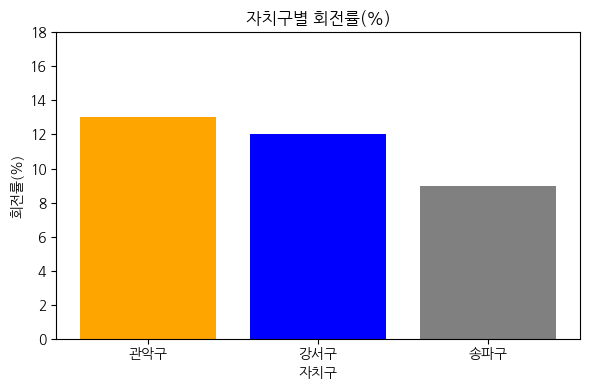

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터프레임
df_s = pd.DataFrame({
    '자치구': ['관악구', '강서구', '송파구'],
    '회전률': [13, 12, 9]
})

# 색상 지정: 관악구(주황), 강서구(파랑), 송파구(회색)
colors = ['orange' if gu == '관악구' else 'blue' if gu == '강서구' else 'gray' for gu in df_s['자치구']]

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(df_s['자치구'], df_s['회전률'], color=colors)
plt.xlabel('자치구')
plt.ylabel('회전률(%)')
plt.title('자치구별 회전률(%)')
plt.ylim(0, max(df_s['회전률']) + 5)  # y축 여유
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

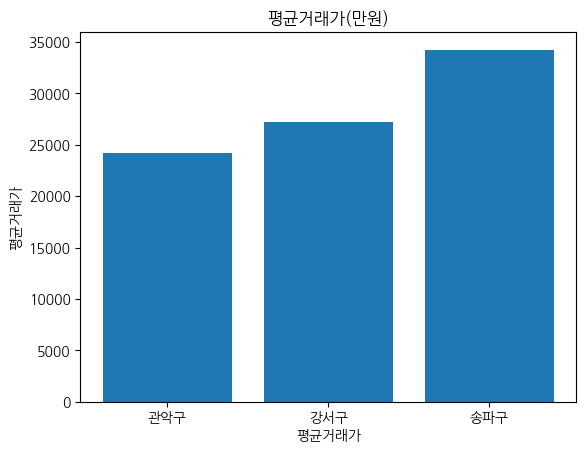

In [45]:
df_a = pd.DataFrame({
    '자치구': ['관악구', '강서구', '송파구'],
    '평균거래가': [24225, 27231, 34252]
})

plt.bar(df_a['자치구'], df_a['평균거래가'])
plt.xlabel('평균거래가')
plt.ylabel('평균거래가')
plt.title('평균거래가(만원)')
plt.show

In [46]:
df_low_15

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,q45,q55,㎡당가격(만원)
2990,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,-1.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,113.186191
488,2022,11500,강서구,10300,화곡동,1.0,대지,395.0,21.0,필립하우스,...,2.0,NaN,NaN,2012.0,연립다세대,직거래,NaN,25900.0,28900.0,130.522088
3351,2022,11500,강서구,10200,등촌동,1.0,대지,519.0,10.0,(519-10),...,-1.0,NaN,NaN,1991.0,연립다세대,직거래,NaN,25900.0,28900.0,142.694064
2989,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,-1.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,149.051491
3705,2023,11500,강서구,10700,외발산동,1.0,대지,216.0,39.0,대덕하이츠빌라,...,-1.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,153.556034
2991,2023,11500,강서구,10300,화곡동,1.0,대지,56.0,215.0,태성빌라(56-215),...,3.0,NaN,NaN,1993.0,연립다세대,직거래,NaN,25900.0,28900.0,156.494523
3996,2023,11500,강서구,10300,화곡동,1.0,대지,467.0,17.0,조은빌라B동,...,-1.0,NaN,NaN,1991.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,161.479742
5343,2024,11500,강서구,10300,화곡동,1.0,대지,0409,0240,경남빌라마동,...,-1.0,NaN,NaN,1986.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,172.885572
5344,2024,11500,강서구,10300,화곡동,1.0,대지,0409,0240,경남빌라마동,...,-1.0,NaN,20240321.0,1986.0,연립다세대,중개거래,서울 강서구,25900.0,28900.0,172.885572
2140,2022,11500,강서구,10300,화곡동,1.0,대지,24.0,126.0,\t(24-126)\t,...,2.0,NaN,NaN,1995.0,오피스텔,직거래,NaN,25900.0,28900.0,176.470588


In [47]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df_low_15,
    x='자치구명',
    y='물건금액(만원)',
    palette=palette,
)
ax.set_title('자치구별 물건금액(만원)', fontproperties=fontprop)
ax.set_xlabel('자치구명', fontproperties=fontprop)
ax.set_ylabel('물건금액(만원)', fontproperties=fontprop)
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [49]:
# 고유 라벨 생성
df_low_15_final['건물_고유라벨'] = (
    df_low_15_final['건물명'] + ' (' +
    df_low_15_final['본번'].astype(str) + '-' +
    df_low_15_final['부번'].astype(str) + ')'
)

# 시각화
plt.figure(figsize=(16, 10))
sns.barplot(
    data=df_low_15_final.sort_values('물건금액(만원)'),
    x='물건금액(만원)',
    y='건물_고유라벨',
    hue='자치구명',
    dodge=False,
    errorbar=None
)
plt.title('자치구별 추천 매물 30개 (건물당 1건, 가격 낮은 순)')
plt.xlabel('거래금액 (만원)')
plt.ylabel('건물명 (본번-부번 포함)')
plt.legend(title='자치구명')
plt.tight_layout()
plt.show()



NameError: name 'df_low_15_final' is not defined